In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Medium,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Medium,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Medium,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Low,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Medium,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,High,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,High,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Medium,5


In [3]:
df.shape

(1599, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Alcohol_content       1599 non-null   object 
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [5]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [7]:
df['Alcohol_content'].value_counts()

Medium    835
High      467
Low       297
Name: Alcohol_content, dtype: int64

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
ord_enc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df1 = ord_enc.fit_transform(df[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

In [10]:
df['Alcohol_content'] = df1
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.0,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.0,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.0,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2.0,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.0,5


In [11]:
# plotting the heat map

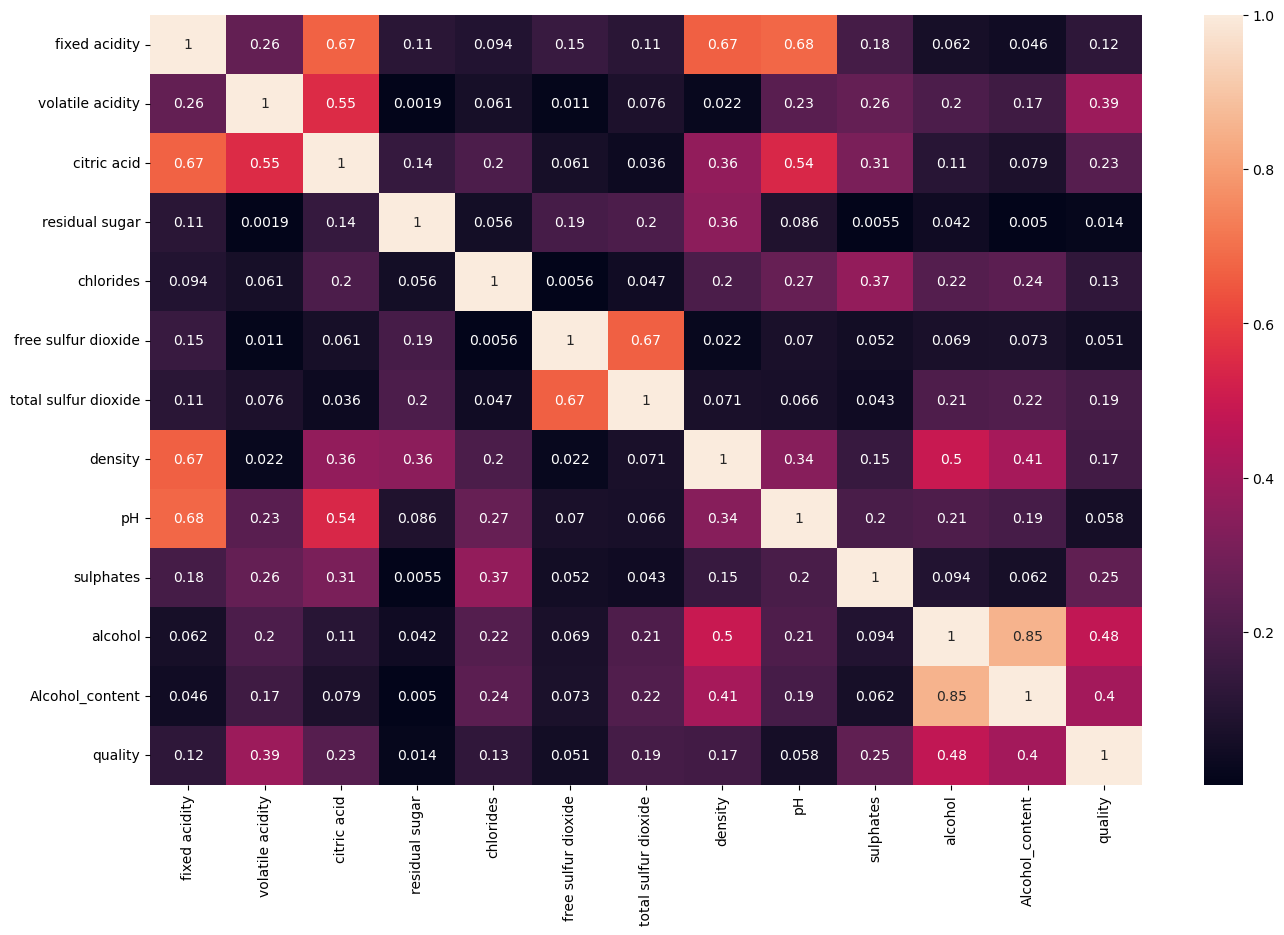

In [12]:
data_corr = df.corr().abs()

plt.figure(figsize=(16,10))
sns.heatmap(data_corr, annot=True, annot_kws={'size':10})
plt.show()

In [13]:
# we can see that alcohol and alcohol_content are correlated too much with the ligh color, so checking multicollinearity prob

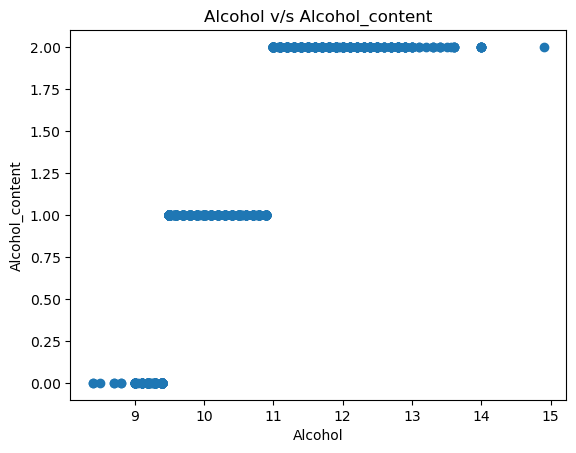

In [14]:
plt.scatter(df.alcohol, df.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_content')
plt.title('Alcohol v/s Alcohol_content')
plt.show()

In [15]:
# as we can see that these 2 above features show a positive trend and thus have multi-collinearity so remove one of them

# now checking which of the above 2 features has less correlation with the feature, will remove that
# will remove alcohol_content as it is less correlated with label

In [16]:
x = df.drop(columns=['Alcohol_content', 'quality'])
y = df['quality']

In [17]:
# no need to apply standard scaler in this algorithm as it is rule based

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=41)

In [19]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
def metric_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train==True:
        y_pred = clf.predict(x_train)
        print('Train Result')
        print('Accuracy Score :- ', accuracy_score(y_train,y_pred), '\n')
        
    elif train==False:
        pred = clf.predict(x_test)
        print('Test Result')
        print('Accuracy Score :- ', accuracy_score(y_test, pred), '\n')
        print('Classification Report :- \n', classification_report(y_test, pred), '\n')

In [21]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

Train Result
Accuracy Score :-  1.0 

Test Result
Accuracy Score :-  0.6175 

Classification Report :- 
               precision    recall  f1-score   support

           3       0.33      0.33      0.33         3
           4       0.08      0.09      0.08        11
           5       0.69      0.68      0.68       157
           6       0.64      0.66      0.65       168
           7       0.52      0.47      0.50        57
           8       0.20      0.25      0.22         4

    accuracy                           0.62       400
   macro avg       0.41      0.41      0.41       400
weighted avg       0.62      0.62      0.62       400
 



In [22]:
y_pred = clf.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[  1,   2,   0,   0,   0,   0],
       [  1,   1,   6,   3,   0,   0],
       [  1,   6, 106,  40,   4,   0],
       [  0,   3,  32, 111,  20,   2],
       [  0,   1,   8,  19,  27,   2],
       [  0,   0,   1,   1,   1,   1]], dtype=int64)

In [23]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Qlt 3', 'Qlt 4', 'Qlt 5', 'Qlt 6', 'Qlt 7', 'Qlt 8'], index=['Qlt 3', 'Qlt 4', 'Qlt 5', 'Qlt 6', 'Qlt 7', 'Qlt 8'])

,Qlt 3,Qlt 4,Qlt 5,Qlt 6,Qlt 7,Qlt 8
Qlt 3,1,2,0,0,0,0
Qlt 4,1,1,6,3,0,0
Qlt 5,1,6,106,40,4,0
Qlt 6,0,3,32,111,20,2
Qlt 7,0,1,8,19,27,2
Qlt 8,0,0,1,1,1,1


In [24]:
grid_para = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(10,15),
    'min_samples_leaf' : range(8,12),
    'min_samples_split' : range(8,12),
    'max_leaf_nodes' : range(30,50)
}

In [25]:
grid_s_cv = GridSearchCV(estimator=clf, param_grid=grid_para, cv=5)

In [26]:
grid_s_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(30, 50),
                         'min_samples_leaf': range(8, 12),
                         'min_samples_split': range(8, 12)})

In [29]:
grid_s_cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 9,
 'min_samples_split': 8}

In [27]:
grid_s_cv.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_leaf=9,
                       min_samples_split=8)

In [82]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, max_leaf_nodes=50, min_samples_leaf=6,
                       min_samples_split=2)

clf.fit(x_train, y_train) 

# change parameters here only as it takes a lot of time

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, min_samples_leaf=6)

In [83]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

Train Result
Accuracy Score :-  0.7397831526271893 

Test Result
Accuracy Score :-  0.605 

Classification Report :- 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.63      0.75      0.68       157
           6       0.60      0.57      0.58       168
           7       0.55      0.49      0.52        57
           8       0.00      0.00      0.00         4

    accuracy                           0.60       400
   macro avg       0.30      0.30      0.30       400
weighted avg       0.58      0.60      0.59       400
 



In [85]:
y_pred = clf.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,   6,   5,   0,   0],
       [  0,   0, 118,  32,   7,   0],
       [  0,   0,  58,  96,  14,   0],
       [  0,   0,   3,  26,  28,   0],
       [  0,   0,   1,   1,   2,   0]], dtype=int64)